# Geometric example

In [1]:
#A small example script showing the usage of the 'geographic' coordinates type for ordinary kriging on a sphere.
from pykrige  import OrdinaryKriging
import numpy as np
from matplotlib import pyplot as plt
# Make this example reproducible:
np.random.seed(89239413)
N = 7
lon = 360.0 * np.random.random(N)
lat = 180.0 / np.pi * np.arcsin(2 * np.random.random(N) - 1)
z = 3.5 * np.random.rand(N) + 2.0

In [2]:
# Generate a regular grid with 60° longitude and 30° latitude steps:
grid_lon = np.linspace(0.0, 360.0, 7)
grid_lat = np.linspace(-90.0, 90.0, 7)

In [3]:
# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)
OK

In [4]:
# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

In [5]:
# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)
# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)


In [6]:
# Print data at equator (last longitude index will show periodicity):
print("Original data:")
print("Longitude:", lon.astype(int))
print("Latitude: ", lat.astype(int))
print("z:        ", np.array_str(z, precision=2))
print("\nKrige at 60° latitude:\n======================")
print("Longitude:", grid_lon)
print("Value:    ", np.array_str(z1[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss1[5, :], precision=2))
print("\nIgnoring curvature:\n=====================")
print("Value:    ", np.array_str(z2[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss2[5, :], precision=2))

Original data:
Longitude: [122 166  92 138  86 122 136]
Latitude:  [-46 -36 -25 -73 -25  50 -29]
z:         [2.75 3.36 2.24 3.07 3.37 5.25 2.82]

Krige at 60° latitude:
Longitude: [  0.  60. 120. 180. 240. 300. 360.]
Value:     [5.29 5.11 5.27 5.17 5.35 5.63 5.29]
Sigma²:    [2.22 1.32 0.42 1.21 2.07 2.48 2.22]

Ignoring curvature:
Value:     [4.55 4.72 5.25 4.82 4.61 4.53 4.48]
Sigma²:    [3.79 2.   0.39 1.85 3.54 5.46 7.53]


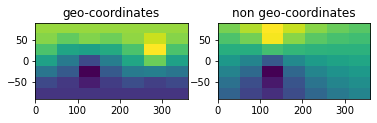

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()